<a href="https://colab.research.google.com/github/daviddralle/rancho_pml_nh/blob/main/PML_LSTM_RANCHO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q neuralhydrology
!pip install -q tensorboard

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.0/176.0 kB 14.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.7/117.7 kB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 76.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 56.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 44.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 78.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
!git clone https://github.com/daviddralle/rancho_pml_nh
!cp -r /content/rancho_pml_nh/* /content/

Cloning into 'rancho_pml_nh'...
remote: Enumerating objects: 45, done.
remote: Counting objects: 100% (45/45), done.
remote: Compressing objects: 100% (34/34), done.
remote: Total 45 (delta 9), reused 43 (delta 7), pack-reused 0 (from 0)
Receiving objects: 100% (45/45), 3.70 MiB | 5.20 MiB/s, done.
Resolving deltas: 100% (9/9), done.


In [ ]:
import pickle
from pathlib import Path
%config InlineBackend.figure_format = 'retina'
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import torch
from neuralhydrology.evaluation import metrics
from neuralhydrology.nh_run import start_run, eval_run
import xarray as xr
import numpy as np
import glob as glob
import os

In [ ]:
# by default we assume that you have at least one CUDA-capable NVIDIA GPU
cf = "/content/model/1_basin.yml"
config_file=Path(cf)
if torch.cuda.is_available():
    start_run(config_file=Path(cf))
else:
    start_run(config_file=Path("1_basin.yml"), gpu=-1)

100%|██████████| 1/1 [00:02<00:00,  2.10s/it]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


# Epoch 1:   0%|          | 0/25 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


# Epoch 4:   0%|          | 0/25 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


# Epoch 7:   0%|          | 0/25 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


# Epoch 10:   0%|          | 0/25 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


# Epoch 13:   0%|          | 0/25 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


# Epoch 16:   0%|          | 0/25 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


# Epoch 19:   0%|          | 0/25 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


# Epoch 22:   0%|          | 0/25 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


# Epoch 25:   0%|          | 0/25 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


# Epoch 28:   0%|          | 0/25 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


# Epoch 31:   0%|          | 0/25 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


# Epoch 34:   0%|          | 0/25 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


# Epoch 37:   0%|          | 0/25 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


# Epoch 40:   0%|          | 0/25 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


# Epoch 43:   0%|          | 0/25 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


# Epoch 46:   0%|          | 0/25 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


# Epoch 49:   0%|          | 0/25 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


# Epoch 50: 100%|██████████| 25/25 [00:01<00:00, 13.78it/s, Loss: 0.0417]


In [ ]:
parent = '/content/runs'
fs = glob.glob(os.path.join(parent,'test_run*'))
daymonth = [item.split('/')[-1].split('_')[2] for item in fs]
days = [item[0:2] for item in daymonth]
months = [item[2:4] for item in daymonth]
times = [item.split('/')[-1].split('_')[3][0:4] for item in fs]
dates = [pd.to_datetime( '2025-' + months[i] + '-' + days[i] + ' ' + times[i] ) for i in range (len(times))]
idx = np.argmax(dates)
cf = fs[idx]

epoch = 50
run_dir = Path(cf)
eval_run(run_dir=run_dir, period = 'test', epoch=epoch)

model_str = "model_epoch0%d"%epoch
with open(run_dir / "test" / model_str / "test_results.p", "rb") as fp:
    results = pickle.load(fp)

/usr/local/lib/python3.11/dist-packages/neuralhydrology/evaluation/tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.model.load_state_dict(torch.load(weight_

# Evaluation: 100%|██████████| 1/1 [00:00<00:00,  2.01it/s]


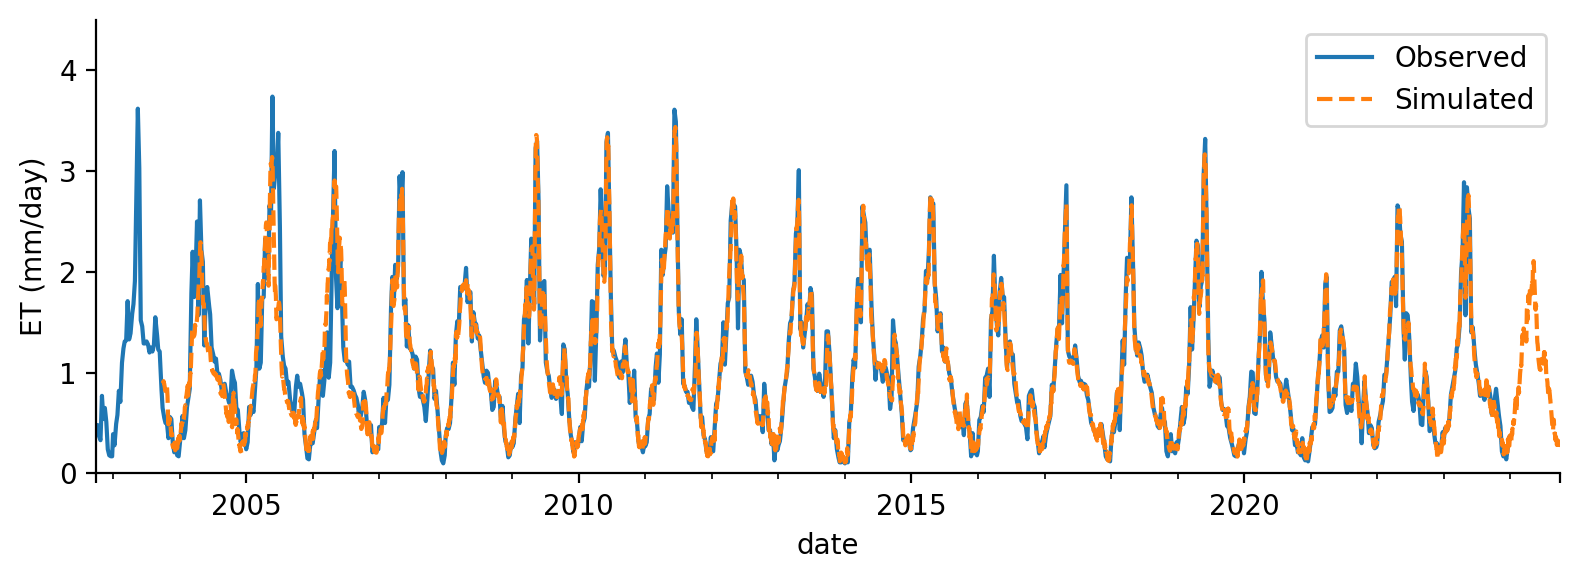

In [ ]:
var = 'ET'
obs = '%s_obs'%var
sim = '%s_sim'%var
timestep = '1D'
start = '2002-10-01'
stop = '2024-10-01'

site = list(results)[0]

# extract observations and simulations
path = '/content/rancho_pml_nh/data/test_generic/time_series/%s.nc4'%site
temp = xr.open_dataset(path).to_dataframe()
simvar = results[site][timestep]['xr'][sim].to_dataframe()
simvar.index = pd.to_datetime([item[0] for item in simvar.index])
fig, ax = plt.subplots(figsize=(8,3))
temp['ET'].plot(ax=ax,label='Observed',ls='-')
simvar['%s_sim'%var].plot(ax=ax,label='Simulated',ls='--')
ax.legend(loc='upper right',fontsize=10)
ax.set_ylabel('ET (mm/day)')
ax.set_xlim(start,stop)
ax.set_ylim(0,4.5)
sns.despine()
fig.tight_layout()

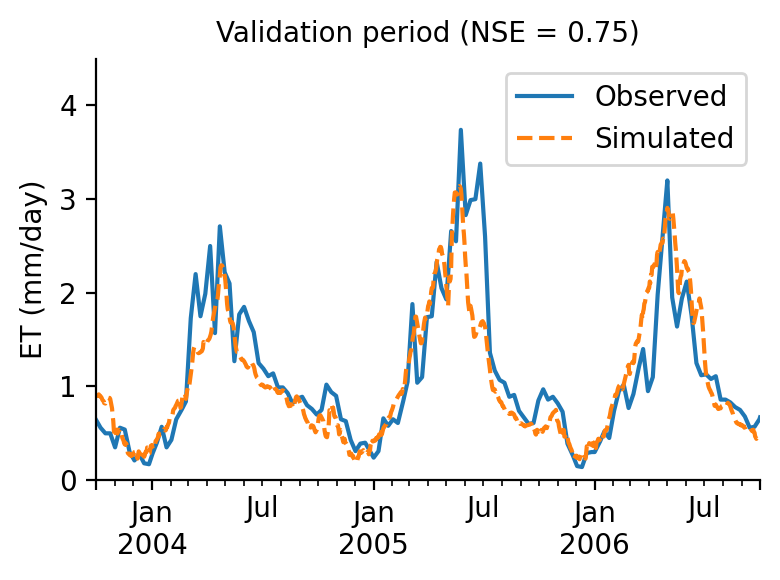

In [ ]:
import yaml
with open('/content/model/1_basin.yml', 'r') as file:
  config_dict = yaml.safe_load(file)
validation_start = pd.to_datetime(config_dict['validation_start_date'],format='%d/%m/%Y')
validation_end = pd.to_datetime(config_dict['validation_end_date'],format='%d/%m/%Y')


simvar = results[site][timestep]['xr'][sim].to_dataframe()
simvar.index = pd.to_datetime([item[0] for item in simvar.index])
simvar = simvar.loc[validation_start:validation_end]
temp = temp.loc[validation_start:validation_end]

def nse(simulated, observed):
    """Calculates the Nash-Sutcliffe Efficiency (NSE)."""
    return 1 - np.sum((simulated - observed)**2) / np.sum((observed - np.mean(observed))**2)
NSE = nse(simvar['%s_sim'%var], temp['ET'])

fig, ax = plt.subplots(figsize=(4,3))
temp['ET'].plot(ax=ax,label='Observed',ls='-')
simvar['%s_sim'%var].plot(ax=ax,label='Simulated',ls='--')
ax.legend(loc='upper right',fontsize=10)
ax.set_ylabel('ET (mm/day)')
ax.set_xlim(validation_start,validation_end)
ax.set_ylim(0,4.5)
ax.set_xlabel('')
ax.set_title('Validation period (NSE = %.2f)'%NSE,fontsize=10)
sns.despine()
fig.tight_layout()

# Other plots

/usr/local/lib/python3.11/dist-packages/pandas/plotting/_matplotlib/core.py:975: UserWarning: This axis already has a converter set and is updating to a potentially incompatible converter
  return ax.plot(*args, **kwds)


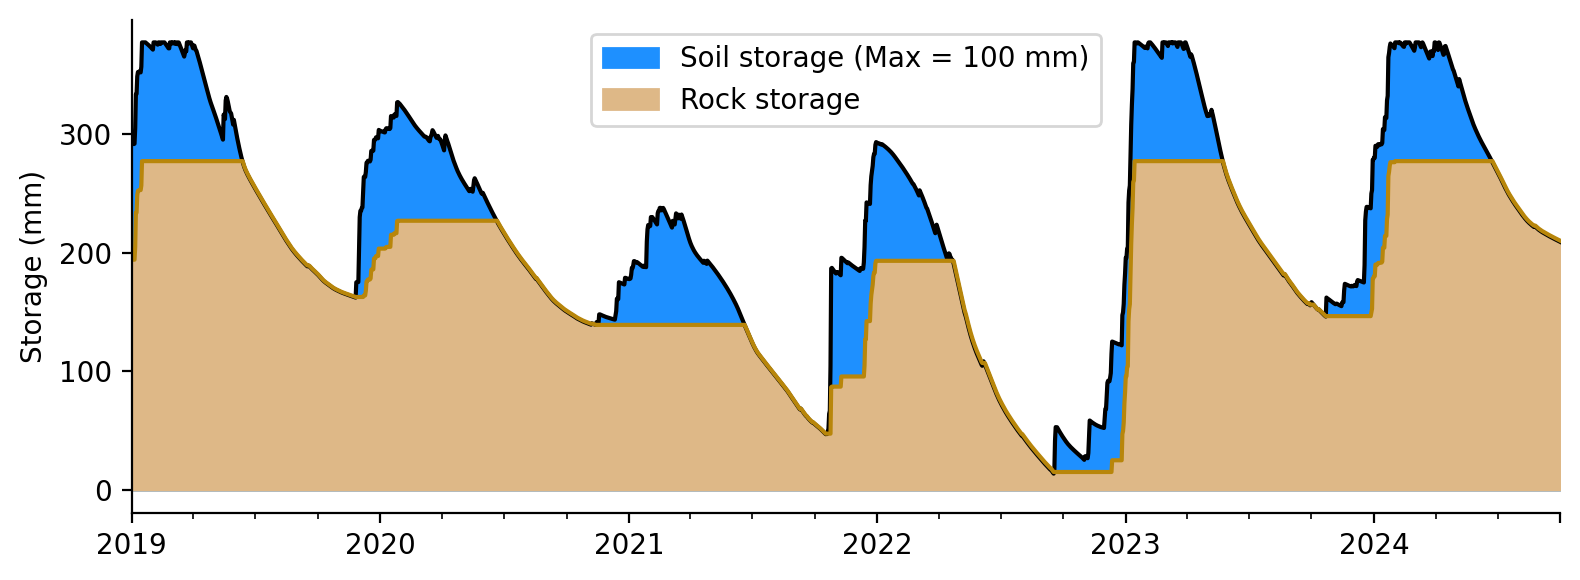

In [ ]:
defdf = pd.read_csv('/content/defdf.csv',parse_dates=True,index_col=0)

ssoil = 100
soil = [0]
rock = [0]
deficit = [0]

counter = 0
# Wang-Erlandsson deficit calculation
for idx,row in defdf.iterrows():
  A = row.ET - row.P

  if A>0:
    if soil[counter] >= ssoil:
      newrock = np.max([0, rock[counter] + A])
      soil.append(soil[counter])
      rock.append(newrock)
    else:
      rock.append(rock[counter])
      soil.append(np.max([0, soil[counter] + A]))
  else:
    soiltemp = soil[counter] + A
    if soiltemp<0:
      soiltemp = 0
      leftover = soil[counter] + A
    else:
      leftover = 0
    rocktemp = np.max([0,rock[counter] + leftover])
    soil.append(soiltemp)
    rock.append(rocktemp)

  next = np.max([0, deficit[counter] + A])
  deficit.append(next)
  counter = counter + 1


defdf['dsoil'] = soil[1:]
defdf['drock'] = rock[1:]
defdf['D'] = deficit[1:]

defdf['S'] = defdf['D'].max() - defdf['D']
defdf['ssoil'] = ssoil - defdf['dsoil']
defdf['srock'] = defdf['S'] - defdf['ssoil']


f,ax = plt.subplots(figsize=(8,3))


ax.fill_between(defdf.index, 0, defdf['S'],color='dodgerblue',label='Soil storage (Max = %d mm)'%int(ssoil))
ax.fill_between(defdf.index, 0, defdf['srock'],color='burlywood',label='Rock storage')
ax.legend(fontsize=8)

defdf['S'].plot(ax=ax,c='k')
defdf['srock'].plot(ax=ax,c='darkgoldenrod')

sns.despine()
ax.set_xlim('2019','2024-10')
ax.set_ylabel('Storage (mm)')
ax.set_xlabel('')

f.tight_layout()